In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
dati = pd.read_csv("dataset/dataset/diabetes.csv")

In [4]:
dati

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
dati.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

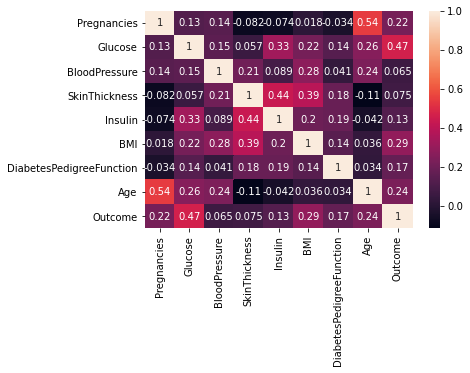

In [7]:
import seaborn as sb
sb.heatmap(dati.corr(), annot = True)

### Classi sbilanciate 

In [9]:
positive = dati[dati["Outcome"] == 1]
negative = dati[dati["Outcome"] == 0]

In [22]:
dati.shape

(768, 9)

In [21]:
positive.shape

(268, 9)

### Capire le differenze che esistono tra le classi

Text(0, 0.5, 'Freq')

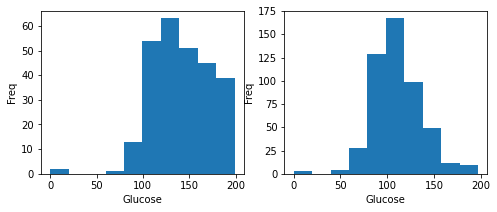

In [25]:
plt.figure(figsize = (8,3))
plt.subplot(1, 2, 1)
plt.hist(positive["Glucose"])
plt.xlabel("Glucose")
plt.ylabel("Freq")
plt.subplot(1, 2, 2)
plt.hist(negative["Glucose"])
plt.xlabel("negative")
plt.xlabel("Glucose")
plt.ylabel("Freq")

### Preparo i dati per l'algorimo di classificazione

In [29]:
X = dati.iloc[:, 0:8 ].values
y = dati.iloc[: , -1].values

In [30]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

### KNN

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
yhat = knn.predict(X_test)

In [39]:
from sklearn import metrics

In [40]:
metrics.accuracy_score(yhat, y_test)

0.7207792207792207

### Fine

<AxesSubplot:>

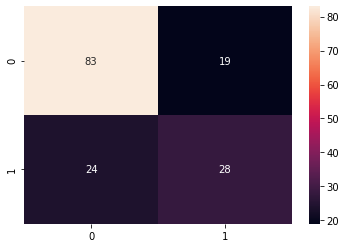

In [51]:
import seaborn as sb
cm = metrics.confusion_matrix(yhat, y_test)
sb.heatmap(cm, annot = True)

### LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(X_train, y_train)

C:\Users\alket\anaconda3\envs\dsml10\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
yhat_lr = lr.predict(X_test)

In [50]:
metrics.accuracy_score(yhat_lr, y_test)

0.8246753246753247

<AxesSubplot:>

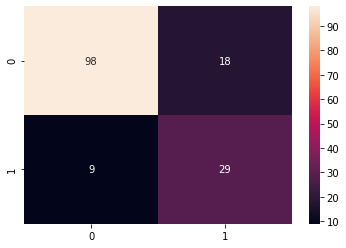

In [53]:
cm_lr = metrics.confusion_matrix(yhat_lr, y_test)
sb.heatmap(cm_lr, annot = True)